In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
ROOT_DIR = "."
FILENAME = "results.tsv"

In [3]:
df = pd.read_csv(os.path.join(ROOT_DIR, FILENAME), sep="\t", header=0)

In [4]:
df.tail()

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6023,pp033,M,60,stroke,Slow,NaN,right_shank,FC,440.0,439.0,1.0,5.0,1,1,1,0,0,1
6024,pp033,M,60,stroke,Slow,NaN,right_shank,FC,768.0,770.0,-2.0,-10.0,1,1,1,0,0,1
6025,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1113.0,1114.0,-1.0,-5.0,1,1,1,0,0,1
6026,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1450.0,1450.0,0.0,0.0,1,1,1,0,0,1
6027,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1804.0,1805.0,-1.0,-5.0,1,1,1,0,0,1


## Gait Parameters

In [6]:
for sub_id in df["sub_id"].unique():
    print(f"{sub_id}")
    df_select = df.loc[df["sub_id"]==sub_id]
    for task in df_select["task"].unique():
        print(f"... {task:s}")
        df_select = df_select.loc[df_select["task"]==task]
        for tracked_point in df_select["tracked_point"].unique():
            print(f"... ... {tracked_point:s}")
            df_select = df_select.loc[df_select["tracked_point"]==tracked_point]
df_select

pp156
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp155
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp167
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp126
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp165
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp154
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp121
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Slow
pp113
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right_shank
... Preferred
... Slow
pp053
... Fast
... ... left_ankle
... ... right_ankle
... ... left_shank
... ... right

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check


In [7]:
sub_id, task, tracked_point

('pp033', 'Slow', 'right_shank')

In [9]:
df_select = df.loc[(df['sub_id']==sub_id) & (df['task']==task) & (df['tracked_point']==tracked_point)]

In [11]:
df_select.sort_values(by=["ix_ref"])

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
6022,pp033,M,60,stroke,Slow,NaN,right_shank,FC,116.0,117.0,-1.0,-5.0,1,1,1,0,0,1
6016,pp033,M,60,stroke,Slow,NaN,right_shank,IC,219.0,229.0,-10.0,-50.0,1,1,1,0,0,1
6023,pp033,M,60,stroke,Slow,NaN,right_shank,FC,440.0,439.0,1.0,5.0,1,1,1,0,0,1
6017,pp033,M,60,stroke,Slow,NaN,right_shank,IC,540.0,548.0,-8.0,-40.0,1,1,1,0,0,1
6024,pp033,M,60,stroke,Slow,NaN,right_shank,FC,768.0,770.0,-2.0,-10.0,1,1,1,0,0,1
6018,pp033,M,60,stroke,Slow,NaN,right_shank,IC,871.0,878.0,-7.0,-35.0,1,1,1,0,0,1
6025,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1113.0,1114.0,-1.0,-5.0,1,1,1,0,0,1
6019,pp033,M,60,stroke,Slow,NaN,right_shank,IC,1224.0,1228.0,-4.0,-20.0,1,1,1,0,0,1
6026,pp033,M,60,stroke,Slow,NaN,right_shank,FC,1450.0,1450.0,0.0,0.0,1,1,1,0,0,1
6020,pp033,M,60,stroke,Slow,NaN,right_shank,IC,1563.0,1567.0,-4.0,-20.0,1,1,1,0,0,1


In [20]:
np.isnan(df_select['run'].iloc[0])

True

In [17]:
true_initial_contacts = np.asarray(df_select.loc[df_select["event_type"]=="IC"]["ix_ref"].values[:], dtype=int)
detected_initial_contacts = np.asarray(df_select.loc[df_select["event_type"]=="IC"]["ix_pred"].values[:], dtype=int)
true_final_contacts = np.asarray(df_select.loc[df_select["event_type"]=="FC"]["ix_ref"].values[:], dtype=int)
detected_final_contacts = np.asarray(df_select.loc[df_select["event_type"]=="FC"]["ix_pred"].values[:], dtype=int)

In [27]:
for i in range(1, len(true_initial_contacts)):
    print(f"Swing time: {(true_initial_contacts[i]-true_initial_contacts[i-1])/200:.3f} v {(detected_initial_contacts[i]-detected_initial_contacts[i-1])/200:.3f}")


Swing time: 1.605 v 1.595
Swing time: 1.655 v 1.650
Swing time: 1.765 v 1.750
Swing time: 1.695 v 1.695
Swing time: 1.710 v 1.715


## Events
Split events by event type. We don't want to mix up the detection of initial contacts and final contacts.

In [5]:
df_ic = df.loc[df['event_type']=='IC']
df_fc = df.loc[df['event_type']=='FC']

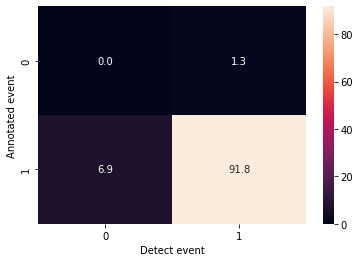

In [6]:
confusion_matrix = pd.crosstab(df_ic['event_true'], df_ic['event_predicted'], rownames=['Annotated event'], colnames=['Detect event'])
normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum().sum() * 100
sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".1f")
plt.show()

In [7]:
confusion_matrix

Detect event,0,1
Annotated event,,
0,0,40
1,209,2781


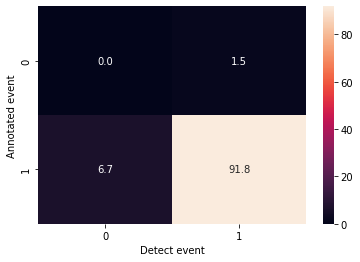

In [8]:
confusion_matrix = pd.crosstab(df_fc['event_true'], df_fc['event_predicted'], rownames=['Annotated event'], colnames=['Detect event'])
normalized_confusion_matrix = confusion_matrix / confusion_matrix.sum().sum() * 100
sns.heatmap(normalized_confusion_matrix, annot=True, fmt=".1f")
plt.show()

## Overall detection performance

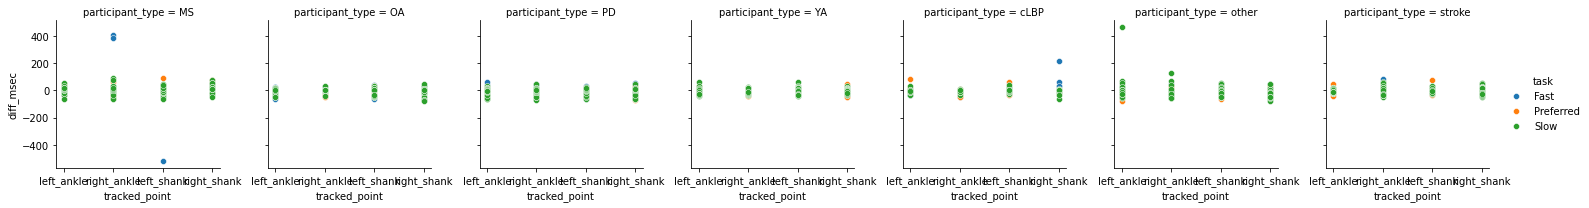

In [15]:
g = sns.FacetGrid(df_ic, col="participant_type", hue="task")
g.map(sns.scatterplot, "tracked_point", "diff_msec")
g.add_legend()

In [43]:
sub_id = "sub-pp044"
task_label = "task-walkSlow"

df_omc = pd.read_csv(os.path.join("Z:\\Keep Control\\Data\\lab dataset\\rawdata", sub_id, "motion", sub_id+"_"+task_label+"_tracksys-omc_motion.tsv"), sep='\t', header=0)
df_events = pd.read_csv(os.path.join("Z:\\Keep Control\\Data\\lab dataset\\rawdata", sub_id, "motion", sub_id+"_"+task_label+"_events.tsv"), sep='\t', header=0)
df_imu = pd.read_csv(os.path.join("Z:\\Keep Control\\Data\\lab dataset\\rawdata", sub_id, "motion", sub_id+"_"+task_label+"_tracksys-imu_motion.tsv"), sep='\t', header=0)

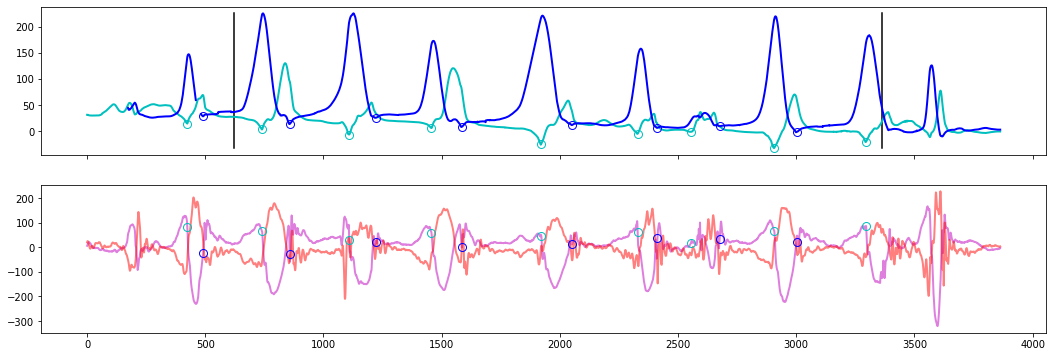

In [44]:
ix_start = df_events[df_events["event_type"]=="start"]["onset"].values[0]
ix_end = df_events[df_events["event_type"]=="stop"]["onset"].values[0]

ix_IC = df_events[df_events["event_type"]=="initial_contact_left"]["onset"].values
ix_FC = df_events[df_events["event_type"]=="final_contact_left"]["onset"].values

fig, axs = plt.subplots(2, 1, figsize=(18, 6), sharex=True)
axs[0].plot([ix_start, ix_start], [df_omc[["l_toe_POS_z", "l_heel_POS_z"]].min().min(), df_omc[["l_toe_POS_z", "l_heel_POS_z"]].max().max()], 'k-')
axs[0].plot([ix_end, ix_end], [df_omc[["l_toe_POS_z", "l_heel_POS_z"]].min().min(), df_omc[["l_toe_POS_z", "l_heel_POS_z"]].max().max()], 'k-')
axs[0].plot(df_omc["l_toe_POS_z"].iloc[:], ls="-", c="c", lw=2)
axs[0].plot(ix_FC, df_omc["l_toe_POS_z"].iloc[ix_FC], ls="none", marker="o", mfc="none", mec="c", ms=8, lw=2)
axs[0].plot(df_omc["l_heel_POS_z"].iloc[:], ls="-", c="b", lw=2)
axs[0].plot(ix_IC, df_omc["l_heel_POS_z"].iloc[ix_IC], ls="none", marker="o", mfc="none", mec="b", ms=8, lw=2)
# axs[0].plot(df_omc["l_sk1_POS_z"].iloc[:], ls="--", c="b", lw=2)
axs[1].plot(df_imu["left_ankle_ANGVEL_z"].iloc[:], ls="-", c="m", alpha=0.5, lw=2)
axs[1].plot(df_imu["left_shank_ANGVEL_y"].iloc[:], ls="-", c="r", alpha=0.5, lw=2)
axs[1].plot(ix_FC, df_imu["left_ankle_ANGVEL_z"].iloc[ix_FC], ls="none", marker="o", mfc="none", mec="c", ms=8, lw=2)
axs[1].plot(ix_IC, df_imu["left_ankle_ANGVEL_z"].iloc[ix_IC], ls="none", marker="o", mfc="none", mec="b", ms=8, lw=2)
plt.show()

In [45]:
ix_IC - ix_start

array([-132,  234,  598,  962, 1429, 1790, 2053, 2379], dtype=int64)

In [18]:
df_ic.loc[(df_ic['participant_type']=='MS') & (df_ic['tracked_point']=='right_ankle')]

,sub_id,gender,age,participant_type,task,run,tracked_point,event_type,ix_ref,ix_pred,diff_samples,diff_msec,event_true,event_predicted,TP,FN,FP,check
13,pp156,F,49,MS,Fast,NaN,right_ankle,IC,37.0,34.0,3.0,15.0,1,1,1,0,0,1
14,pp156,F,49,MS,Fast,NaN,right_ankle,IC,234.0,230.0,4.0,20.0,1,1,1,0,0,1
15,pp156,F,49,MS,Fast,NaN,right_ankle,IC,424.0,419.0,5.0,25.0,1,1,1,0,0,1
16,pp156,F,49,MS,Fast,NaN,right_ankle,IC,606.0,604.0,2.0,10.0,1,1,1,0,0,1
17,pp156,F,49,MS,Fast,NaN,right_ankle,IC,785.0,784.0,1.0,5.0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,pp078,M,26,MS,Slow,NaN,right_ankle,IC,1932.0,1925.0,7.0,35.0,1,1,1,0,0,1
2991,pp078,M,26,MS,Slow,NaN,right_ankle,IC,2409.0,NaN,NaN,NaN,1,0,0,1,0,1
2992,pp078,M,26,MS,Slow,NaN,right_ankle,IC,2883.0,NaN,NaN,NaN,1,0,0,1,0,1
2993,pp078,M,26,MS,Slow,NaN,right_ankle,IC,3350.0,3348.0,2.0,10.0,1,1,1,0,0,1


## Time error

In [12]:
groups = df_ic.groupby(['participant_type', 'tracked_point'])
for k, v in groups:
    print(k)

('MS', 'left_ankle')
('MS', 'left_shank')
('MS', 'right_ankle')
('MS', 'right_shank')
('OA', 'left_ankle')
('OA', 'left_shank')
('OA', 'right_ankle')
('OA', 'right_shank')
('PD', 'left_ankle')
('PD', 'left_shank')
('PD', 'right_ankle')
('PD', 'right_shank')
('YA', 'left_ankle')
('YA', 'left_shank')
('YA', 'right_ankle')
('YA', 'right_shank')
('cLBP', 'left_ankle')
('cLBP', 'left_shank')
('cLBP', 'right_ankle')
('cLBP', 'right_shank')
('other', 'left_ankle')
('other', 'left_shank')
('other', 'right_ankle')
('other', 'right_shank')
('stroke', 'left_ankle')
('stroke', 'left_shank')
('stroke', 'right_ankle')
('stroke', 'right_shank')


In [ ]:
df_ic["diff"].describe()

count    1292.000000
mean       -0.962074
std         6.355779
min      -104.000000
25%        -3.000000
50%        -1.000000
75%         1.000000
max        82.000000
Name: diff, dtype: float64

In [ ]:
(df_ic["diff"].quantile(0.1), df_ic["diff"].quantile(0.9))

(-6.0, 3.0)

In [ ]:
df_ic.loc[df_ic["diff"]<df_ic["diff"].quantile(0.1)]

,sub,gender,participant_type,task,run,side,event_type,ix_ref,ix_pred,diff,tp,fp,fn,checksum
97,pp012,M,other,Slow,NaN,left,IC,711.0,718.0,-7.0,1,0,0,1
102,pp012,M,other,Slow,NaN,left,IC,1814.0,1824.0,-10.0,1,0,0,1
322,pp025,M,stroke,Fast,NaN,right,IC,499.0,508.0,-9.0,1,0,0,1
443,pp029,M,MS,Preferred,NaN,left,IC,292.0,299.0,-7.0,1,0,0,1
455,pp029,M,MS,Preferred,NaN,right,IC,962.0,971.0,-9.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2616,pp140,M,PD,Slow,on,right,IC,1252.0,1259.0,-7.0,1,0,0,1
2617,pp140,M,PD,Slow,on,right,IC,1556.0,1568.0,-12.0,1,0,0,1
2673,pp149,M,stroke,Slow,NaN,right,IC,1876.0,1909.0,-33.0,1,0,0,1
2738,pp155,F,MS,Fast,NaN,left,IC,34.0,138.0,-104.0,1,0,0,1


/home/robbin/Projects/my-gait-events-tcn/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-25.0, 25.0)

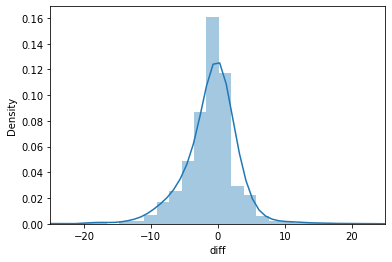

In [ ]:
fig, ax = plt.subplots(1, 1)
sns.distplot(df_ic['diff'], bins=100)
ax.set_xlim([-25, 25])